In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 0 ... 1 1 6] [0 7 7 ... 6 2 1]
0.11551219512195122
Iteration:  10
[0 9 2 ... 8 3 8] [0 7 7 ... 6 2 1]
0.2114390243902439
Iteration:  20
[0 9 2 ... 8 3 8] [0 7 7 ... 6 2 1]
0.2866341463414634
Iteration:  30
[0 9 2 ... 8 3 1] [0 7 7 ... 6 2 1]
0.351390243902439
Iteration:  40
[0 9 2 ... 8 2 1] [0 7 7 ... 6 2 1]
0.3937560975609756
Iteration:  50
[2 9 2 ... 8 2 1] [0 7 7 ... 6 2 1]
0.4328780487804878
Iteration:  60
[6 9 7 ... 3 2 1] [0 7 7 ... 6 2 1]
0.48104878048780486
Iteration:  70
[6 9 7 ... 3 2 1] [0 7 7 ... 6 2 1]
0.5319512195121952
Iteration:  80
[6 7 7 ... 3 2 1] [0 7 7 ... 6 2 1]
0.5712926829268292
Iteration:  90
[6 7 7 ... 3 0 1] [0 7 7 ... 6 2 1]
0.5985609756097561
Iteration:  100
[0 7 7 ... 2 0 1] [0 7 7 ... 6 2 1]
0.622780487804878
Iteration:  110
[0 7 7 ... 2 0 1] [0 7 7 ... 6 2 1]
0.6409024390243903
Iteration:  120
[0 7 7 ... 2 0 1] [0 7 7 ... 6 2 1]
0.6564146341463415
Iteration:  130
[0 7 7 ... 2 0 1] [0 7 7 ... 6 2 1]
0.6704634146341464
Iteration:  140
[

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


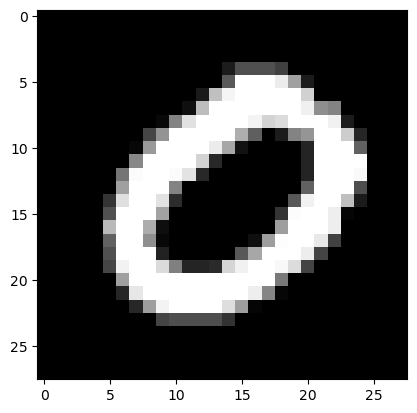

Prediction:  [7]
Label:  7


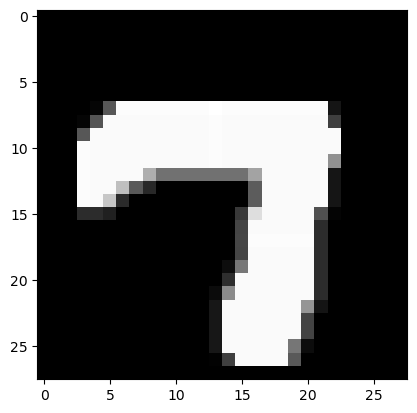

Prediction:  [7]
Label:  7


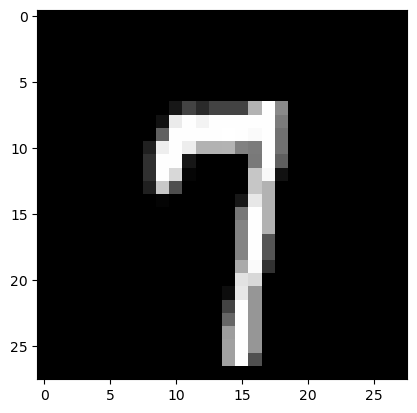

Prediction:  [8]
Label:  8


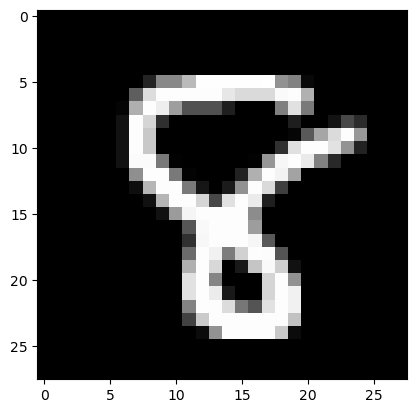

In [7]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [8]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 1 3 3 1 3 0 5 9 9 0 9 7 4 4 5 4 1 8 3 0 3 1 6 6 4 0 2 1 1 6 6 9 3 3 0 2
 0 0 8 1 0 5 6 3 0 8 2 1 3 2 3 1 1 2 5 5 5 0 5 8 2 2 2 9 3 4 0 3 7 7 3 2 4
 3 9 2 6 9 1 7 7 1 6 0 8 6 2 8 5 8 8 1 4 7 5 7 0 2 6 4 7 3 1 8 3 1 2 3 4 1
 6 7 0 1 1 9 4 1 3 1 4 5 3 4 2 9 2 5 7 6 6 5 1 3 4 5 3 6 3 9 2 0 5 1 7 2 7
 1 3 9 9 1 1 7 6 7 3 4 3 8 0 7 0 2 6 1 1 6 9 8 1 4 1 9 1 0 5 7 5 9 9 3 0 9
 8 3 1 9 7 3 1 8 1 2 8 7 1 6 4 0 7 9 2 8 7 4 1 5 1 2 6 3 2 4 8 7 9 0 1 8 6
 2 2 9 9 6 4 7 3 2 1 6 7 8 0 5 3 6 9 7 2 9 8 5 0 5 9 3 2 8 9 2 0 9 9 2 4 0
 8 3 8 2 5 3 1 2 1 5 4 0 6 4 0 4 6 8 5 6 1 6 6 3 0 1 9 6 1 5 2 7 2 1 6 7 1
 4 9 9 5 7 6 4 2 7 7 0 7 0 7 8 0 0 3 8 3 7 7 4 8 5 1 2 4 2 5 7 0 1 9 1 5 1
 8 6 7 9 4 6 8 2 2 4 0 1 0 5 7 6 6 0 3 6 1 9 4 5 8 7 8 2 5 9 0 4 0 2 6 4 2
 1 4 1 7 3 9 0 6 3 8 7 2 1 4 5 7 1 8 9 7 8 0 1 5 1 5 6 4 4 7 5 4 9 9 5 4 4
 4 1 8 1 7 8 4 3 9 8 6 4 7 0 8 3 1 1 8 3 2 1 2 6 9 1 7 0 8 0 3 1 2 3 6 3 1
 8 8 1 3 2 0 9 0 3 9 6 1 7 1 9 8 7 1 3 5 9 1 1 0 1 7 8 1 9 2 3 2 1 3 5 6 9
 2 0 5 6 8 1 1 2 1 3 0 2 

0.832

In [12]:
print(classification_report(dev_predictions, Y_dev))


              precision    recall  f1-score   support

           0       0.91      0.86      0.88        98
           1       0.95      0.92      0.93       148
           2       0.79      0.83      0.81       101
           3       0.89      0.85      0.87       100
           4       0.82      0.85      0.84        95
           5       0.61      0.72      0.66        72
           6       0.91      0.87      0.89        95
           7       0.85      0.93      0.89       100
           8       0.72      0.66      0.69       101
           9       0.79      0.74      0.77        90

    accuracy                           0.83      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.84      0.83      0.83      1000

